In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the data (rescale pixel values from 0-255 to 0-1)
train_images, test_images = train_images / 255.0, test_images / 255.0

# Split the training data into training and validation sets (80% train, 20% validation)
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


**Building the CNN model**

In [ ]:
# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compiling the model**

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Training the model with validation**

In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=10,
    validation_data=(val_images, val_labels)
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 54ms/step - accuracy: 0.3373 - loss: 1.7910 - val_accuracy: 0.5403 - val_loss: 1.2810
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 43ms/step - accuracy: 0.5656 - loss: 1.2254 - val_accuracy: 0.5903 - val_loss: 1.1536
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6290 - loss: 1.0543 - val_accuracy: 0.6454 - val_loss: 1.0165
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6619 - loss: 0.9521 - val_accuracy: 0.6745 - val_loss: 0.9348
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 53s 42ms/step - accuracy: 0.6969 - loss: 0.8560 - val_accuracy: 0.6822 - val_loss: 0.9136
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7260 - loss: 0.7795 - val_accuracy: 0.6886 - val_loss: 0.8937
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7481 - loss: 0.7204 - val_accuracy: 0.6854 - val_loss: 0.9166
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7609 -

**Evaluating the model on the test set**

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

313/313 - 3s - 10ms/step - accuracy: 0.7039 - loss: 0.8936
Test accuracy: 0.7038999795913696


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

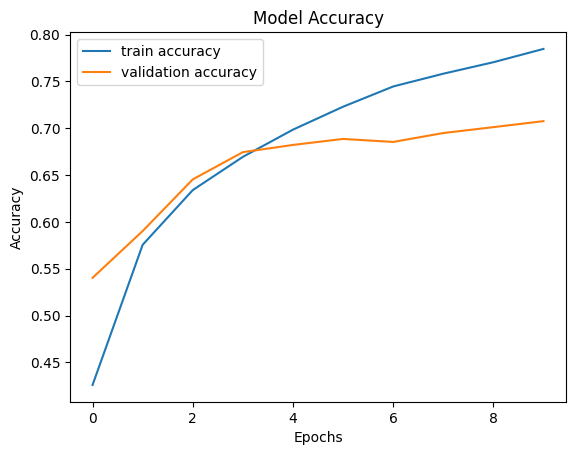

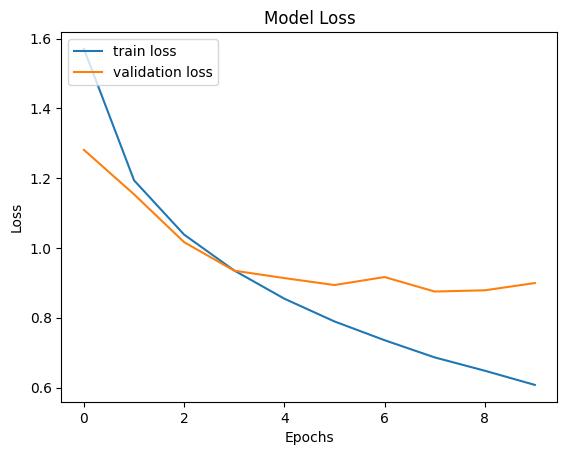

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()
